In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:13<00:00, 81.2MB/s]
100% 812M/812M [00:13<00:00, 64.1MB/s]


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.models as models

In [ ]:
import os
import cv2
import numpy as np
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D, Activation
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip install tensorflow-hub

In [ ]:
# Extract dataset
!unzip -q dogs-vs-cats.zip
with ZipFile('train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train/')
    print('Dataset extracted successfully.')

Dataset extracted successfully.


In [ ]:
images = []
labels = []
def load_data():
    data_dir = '/content/train/train'

In [ ]:
# Load data function
def load_data():
    data_dir = '/content/train/train'
    images = []
    labels = []
    for filename in os.listdir(data_dir):
        label = 1 if 'dog' in filename else 0
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (70, 70))  # Resize to 70x70
            images.append(img)
            labels.append(label)
        else:
            print(f"Error loading image: {img_path}")
    return np.array(images), np.array(labels)


In [ ]:
images, labels = load_data()
images = images.astype('float32') / 255.0

In [ ]:

if len(images) == 0:
    print("No images found in the directory:", '/content/train/train')
else:
    print("Number of images loaded:", len(images))

Number of images loaded: 25000


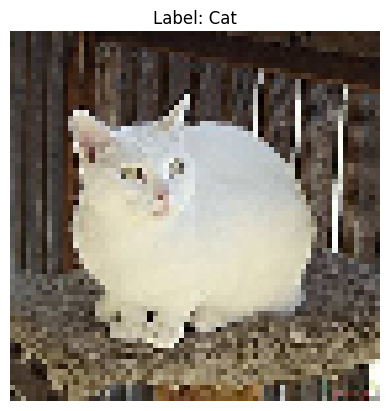

In [ ]:

    index = random.randint(0, len(images)-1)
    plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
    plt.title('Label: ' + ('Dog' if labels[index] == 1 else 'Cat'))
    plt.axis('off')
    plt.show()

In [ ]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
def build_alexnet(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Build VGGNet model
def build_vggnet(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
# Model parameters
input_shape = (70, 70, 3)  # Image size 70x70
num_classes = 2

In [ ]:
!pip install tensorflow
!pip install tensorflow-keras

ERROR: Could not find a version that satisfies the requirement tensorflow-keras (from versions: none)
ERROR: No matching distribution found for tensorflow-keras


In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten

In [ ]:
# Build AlexNet model
def build_alexnet(input_shape, num_classes):
    from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dense, Dropout, Flatten
    model = Sequential()
    model.add(Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((3, 3), strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))  # Replace 'num' with 'num_classes'
    return model

alexnet_model = build_alexnet(input_shape, num_classes)
vggnet_model = build_vggnet(input_shape, num_classes)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
alexnet_model = build_alexnet(input_shape, num_classes)
alexnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
vggnet_model = build_vggnet(input_shape, num_classes)
vggnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
print("Training AlexNet...")
alexnet_history = alexnet_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Training AlexNet...
Epoch 1/5
547/547 [==============================] - 17s 21ms/step - loss: 0.6081 - accuracy: 0.6657 - val_loss: 0.6933 - val_accuracy: 0.5269
Epoch 2/5
547/547 [==============================] - 9s 16ms/step - loss: 0.5084 - accuracy: 0.7486 - val_loss: 0.6815 - val_accuracy: 0.6195
Epoch 3/5
547/547 [==============================] - 9s 17ms/step - loss: 0.4451 - accuracy: 0.7889 - val_loss: 0.5086 - val_accuracy: 0.7507
Epoch 4/5
547/547 [==============================] - 9s 17ms/step - loss: 0.4014 - accuracy: 0.8181 - val_loss: 0.6206 - val_accuracy: 0.6747
Epoch 5/5
547/547 [==============================] - 9s 16ms/step - loss: 0.3520 - accuracy: 0.8409 - val_loss: 0.5843 - val_accuracy: 0.7213


In [ ]:
# Train VGGNet
print("\nTraining VGGNet...")
vggnet_history = vggnet_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Training VGGNet...
Epoch 1/5
547/547 [==============================] - 16s 27ms/step - loss: 0.4868 - accuracy: 0.7597 - val_loss: 0.4007 - val_accuracy: 0.8155
Epoch 2/5
547/547 [==============================] - 13s 23ms/step - loss: 0.4021 - accuracy: 0.8161 - val_loss: 0.3761 - val_accuracy: 0.8275
Epoch 3/5
547/547 [==============================] - 13s 24ms/step - loss: 0.3797 - accuracy: 0.8253 - val_loss: 0.3682 - val_accuracy: 0.8309
Epoch 4/5
547/547 [==============================] - 13s 24ms/step - loss: 0.3601 - accuracy: 0.8371 - val_loss: 0.3615 - val_accuracy: 0.8336
Epoch 5/5
547/547 [==============================] - 12s 23ms/step - loss: 0.3465 - accuracy: 0.8427 - val_loss: 0.3517 - val_accuracy: 0.8416


In [ ]:
# Evaluate AlexNet
alexnet_loss, alexnet_accuracy = alexnet_model.evaluate(X_test, y_test)
print("AlexNet Test Loss:", alexnet_loss)
print("AlexNet Test Accuracy:", alexnet_accuracy)

118/118 [==============================] - 1s 6ms/step - loss: 0.6105 - accuracy: 0.7029
AlexNet Test Loss: 0.6104794144630432
AlexNet Test Accuracy: 0.7029333114624023


In [ ]:
# Evaluate AlexNet on training data
alexnet_train_loss, alexnet_train_accuracy = alexnet_model.evaluate(X_train, y_train)
print("\nAlexNet Training Loss:", alexnet_train_loss)
print("AlexNet Training Accuracy:", alexnet_train_accuracy)

547/547 [==============================] - 3s 5ms/step - loss: 0.4842 - accuracy: 0.7710

AlexNet Training Loss: 0.4841534495353699
AlexNet Training Accuracy: 0.7710285782814026


In [ ]:
# Evaluate VGGNet
vggnet_loss, vggnet_accuracy = vggnet_model.evaluate(X_test, y_test)
print("VGGNet Test Loss:", vggnet_loss)
print("VGGNet Test Accuracy:", vggnet_accuracy)

118/118 [==============================] - 2s 18ms/step - loss: 0.3689 - accuracy: 0.8312
VGGNet Test Loss: 0.36892378330230713
VGGNet Test Accuracy: 0.8312000036239624


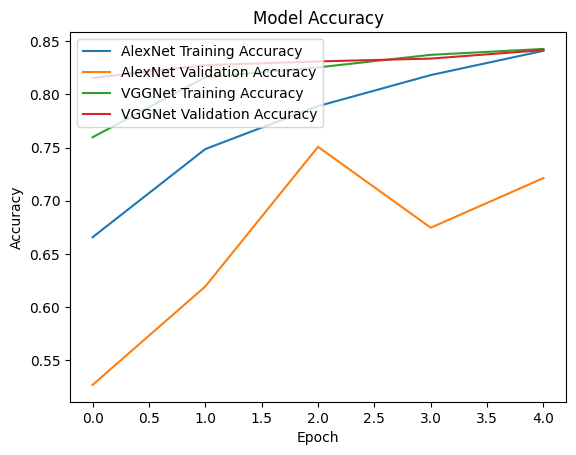

In [ ]:
# Plotting the accuracies for comparison
plt.plot(alexnet_history.history['accuracy'], label='AlexNet Training Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Validation Accuracy')
plt.plot(vggnet_history.history['accuracy'], label='VGGNet Training Accuracy')
plt.plot(vggnet_history.history['val_accuracy'], label='VGGNet Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

vgg
